<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Image-Test" data-toc-modified-id="Image-Test-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Image Test</a></span></li><li><span><a href="#Image-Size" data-toc-modified-id="Image-Size-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Image Size</a></span></li><li><span><a href="#Array-View" data-toc-modified-id="Array-View-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Array View</a></span></li><li><span><a href="#Tensor-View" data-toc-modified-id="Tensor-View-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Tensor View</a></span></li></ul></li><li><span><a href="#Make-dataframe-with-all-files" data-toc-modified-id="Make-dataframe-with-all-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Make dataframe with all files</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Traditional-Methods" data-toc-modified-id="Traditional-Methods-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Traditional Methods</a></span></li><li><span><a href="#Pytorch-Transfer-Learning" data-toc-modified-id="Pytorch-Transfer-Learning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pytorch Transfer Learning</a></span><ul class="toc-item"><li><span><a href="#Training-Folder" data-toc-modified-id="Training-Folder-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Training Folder</a></span></li><li><span><a href="#Test-Folder" data-toc-modified-id="Test-Folder-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Test Folder</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Image-Check" data-toc-modified-id="Image-Check-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Image Check</a></span></li><li><span><a href="#Image-Loading-and-Sizes" data-toc-modified-id="Image-Loading-and-Sizes-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Image Loading and Sizes</a></span></li></ul></li><li><span><a href="#Transformations" data-toc-modified-id="Transformations-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Transformations</a></span></li><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Batch-Checking" data-toc-modified-id="Batch-Checking-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Batch Checking</a></span></li><li><span><a href="#Classes" data-toc-modified-id="Classes-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Classes</a></span><ul class="toc-item"><li><span><a href="#CNN" data-toc-modified-id="CNN-6.7.1"><span class="toc-item-num">6.7.1&nbsp;&nbsp;</span>CNN</a></span></li></ul></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>Parameters</a></span></li></ul></li></ul></div>

## Libraries

In [1]:
# usual suspects
import os
import time
import shutil
import requests
import zipfile
from PIL import Image

import numpy as np
import pandas as pd
from cycler import cycler

# the good stuff
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, models, transforms

# standard sklearn import
from sklearn.metrics import accuracy_score

# minor changes to plotting functions
import matplotlib.pyplot as plt
cmap=plt.cm.tab10
c = cycler('color', cmap(np.linspace(0,1,10)))
plt.rcParams["axes.prop_cycle"] = c


%matplotlib inline
%config InlineBackend.figure_format='retina'

# change margin size of jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Torch
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

#System
import os

#Image
from PIL import Image
from IPython.display import display
from torchvision.utils import make_grid

#Warning Ignore
import warnings
warnings.filterwarnings("ignore")

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Preprocessing 

### Image Test

In [4]:
img_path = "./data/Futurama/character02/0326_16.png"
image = Image.open(img_path)

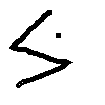

In [5]:
image

### Image Size

In [6]:
omni_dim = image.size
###
#DO THIS: Find better syntax for calling the dimensions of the images
###
omni_dim

(105, 105)

### Array View

In [7]:
img = Image.open(img_path).convert("L")
img = np.array(img)
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [8]:
len(img[0])

105

In [9]:
len(img)

105

### Tensor View

In [10]:
image = transforms.ToTensor()(image).unsqueeze(0) # unsqueeze to add artificial first dimension
image = Variable(image)
image

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]])

In [11]:
image.size()

torch.Size([1, 1, 105, 105])

## Make dataframe with all files

In [ ]:
language_dict = {}
i = 0
for language in os.listdir("./data"):
    for char in os.listdir("./data/{}".format(language)):
        for file in os.listdir("./data/{}/{}".format(language, char)):
            #Make empty data frame
            language_dict[i] = {}
            
            #Bring in file information
            language_dict[i]['language'] = language
            language_dict[i]['char'] = char
            language_dict[i]['image_name'] = file
            language_dict[i]['path'] = "./data/{}/{}/{}".format(language,
                                                                char,
                                                                file)
            
            #Image to array
            img = Image.open(language_dict[i]['path']).convert("L")
            img = np.array(img)
            language_dict[i]['image_array'] = img
            
            #Import image as tensor
            image = Image.open(language_dict[i]['path'])
            image = transforms.ToTensor()(image).unsqueeze(0) # unsqueeze to add artificial first dimension
            image = Variable(image)
            language_dict[i]['image_tensor'] = image
            
            #Add onto index
            i += 1

#Set and name dataframe
omni = pd.DataFrame.from_dict(language_dict).T

#build target column
omni["target"] = omni["language"] + "_" + omni["char"]
omni.head()

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = omni[[x for x in omni.columns if x is not "target"]]
y = omni["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=88,
                                                    stratify = y)

In [ ]:
len(X_test)

In [ ]:
X_test.head()

## Traditional Methods

## Pytorch Transfer Learning

In [ ]:
#This syntax is a little bacwards, building a dictionary to build a dataframe,
#and then building a dictionary again. But, since we are using sci-kit learn
#earlier, it is a little clearner to go backwards again
X_train_dict = X_train.T.to_dict()
X_test_dict = X_test.T.to_dict()

### Training Folder

In [ ]:
os.system('mkdir ./split')
os.system('mkdir ./split/train')
i = 0
for x in X_train_dict:
    entry = X_train_dict[x]
    path = entry["path"]
    lang = entry["language"]
    char = entry["char"]
    name = entry["image_name"]
    os.system('mkdir ./split/train/{}_{}'.format(lang,char))
    os.system('cp {} ./split/train/{}_{}/{}'.format(path,lang,char,name))
    i += 1
    if i % 1000 == 0: print(i)

### Test Folder

In [ ]:
os.system('mkdir ./split/test')
i = 0
for x in X_test_dict:
    entry = X_test_dict[x]
    path = entry["path"]
    lang = entry["language"]
    char = entry["char"]
    name = entry["image_name"]
    os.system('mkdir ./split/test/{}_{}'.format(lang,char))
    os.system('cp {} ./split/test/{}_{}/{}'.format(path,lang,char,name))
    i += 1
    if i % 1000 == 0: print(i)

### Exploratory Data Analysis

#### Image Check

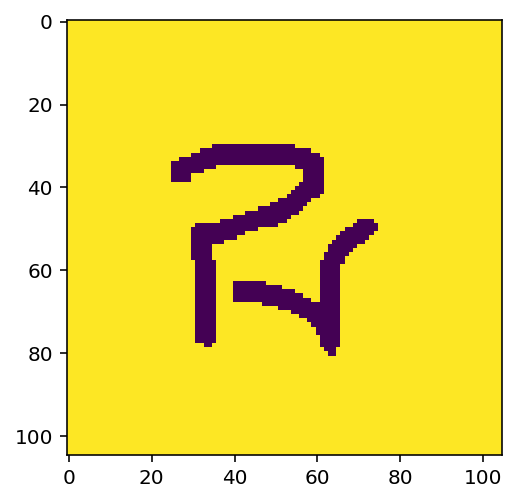

In [12]:
import matplotlib.image as mpimg
img=mpimg.imread("./split/train/Atlantean_character25/1035_10.png")
plt.imshow(img);

#### Image Loading and Sizes

In [4]:
path = "./split"
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder + "/" + img)

img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
        
print("{} total, {} rejected".format(len(img_sizes),len(rejected)))

pd.DataFrame(img_sizes, columns = ["width", "height"]).describe()

24680 total, 0 rejected


,width,height
count,24680.0,24680.0
mean,105.0,105.0
std,0.0,0.0
min,105.0,105.0
25%,105.0,105.0
50%,105.0,105.0
75%,105.0,105.0
max,105.0,105.0


<b>All of the images are the same size, not going to need much in the way of transformations</b>

### Transformations

In [5]:
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),
    #transforms.RandomHorizontalFlip(p = 0), #Flipping characters may confuse network
    transforms.Resize(105),
    transforms.CenterCrop(105),
    transforms.ToTensor(),
    transforms.Normalize(mean = [.485, .456, .406], std = [.229, .224, .225])
])

#We do not want to apply any of the random elements to the test set
test_transforms = transforms.Compose([
    transforms.Resize(105),
    transforms.CenterCrop(105),
    transforms.ToTensor(),
    transforms.Normalize(mean = [.485, .456, .406], std = [.229, .224, .225])
])

### Data Loading

In [6]:
root = "./split"

train_data = datasets.ImageFolder(os.path.join(root,"train"), 
                                  transform = train_transforms)

test_data = datasets.ImageFolder(os.path.join(root,"test"), 
                                  transform = test_transforms)

torch.manual_seed(42)

train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10)

class_names = train_data.classes
class_size = len(class_names)

In [7]:
print("{} Classes\n{} Training Batches\n{} Test Batches".format(class_size, len(train_loader), len(test_loader)))

1234 Classes
1654 Training Batches
815 Test Batches


### Batch Checking

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


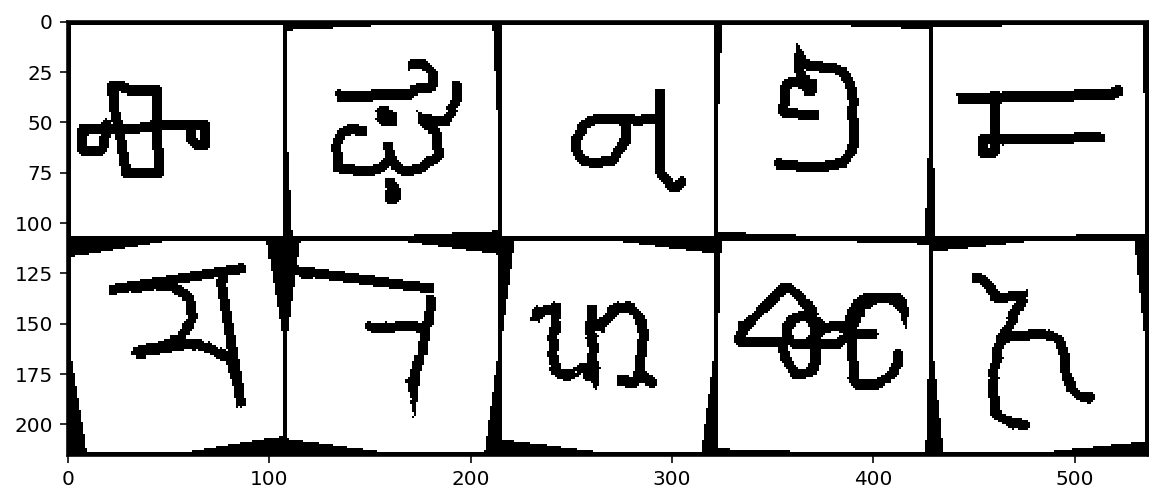

In [8]:
for images, labels in train_loader:
    break

im = make_grid(images,nrow = 5)

plt.figure(figsize = (12,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

### Classes

#### CNN

In [9]:
round(((((105 - 2) / 2) - 2) / 3 - 2)/4)

4

In [10]:
class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels  = 3,
                               out_channels = 6, 
                               kernel_size  = 3,
                               stride       = 1)
        
        self.conv2 = nn.Conv2d(in_channels  = 6,
                               out_channels = 12, 
                               kernel_size  = 3,
                               stride       = 1)
        
        self.conv3 = nn.Conv2d(in_channels  = 12,
                               out_channels = 18, 
                               kernel_size  = 3,
                               stride       = 1)
        
###
#Linear Layer Math
#floor(105 - 2 {we lose two one the side for padding})/2 {since pooling layer is applied} for each convolution
#We are using two convolutions so...
#round((((105 - 2) / 2) - 2) / 2)  = 24


        self.fc1 = nn.Linear(4*4*18,class_size * 6) # Calculation above and 16 filters above
        self.fc2 = nn.Linear(class_size * 4, class_size * 2)
        self.fc3 = nn.Linear(class_size * 2, class_size * 1)
        
    
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2D(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2D(X,3,3)
        X = F.relu(self.conv3(X))
        X = F.max_pool2D(X,4,4)
        X = X.view(-1,4*4*18) #Flattening network
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X,dim = 1)
        

In [11]:
torch.manual_seed(88)
CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr = .001)

In [12]:
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(12, 18, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=288, out_features=7404, bias=True)
  (fc2): Linear(in_features=4936, out_features=2468, bias=True)
  (fc3): Linear(in_features=2468, out_features=1234, bias=True)
)

In [13]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')

count_parameters(CNNmodel)

     162
       6
     648
      12
    1944
      18
 2132352
    7404
12182048
    2468
 3045512
    1234
________
17373808


In [ ]:
import time 
start_time = time.time()

epochs = 3

max_trn_batch = 800 # 10 Images per batch
max_tst_batch = 300 

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train,y_train) in enumerate(train_loader):
        
        if b == max_trn_batch:
            break
            
        b += 1
        
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)
        
        #Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        #Update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 200 == 0:
            print( "Epoch {} Loss {} ".format(i,loss.item()))
                  
    train_losses.append(loss)
    train_correct.append(trn_correct)
                  
    #Make sure we dont"t update network with tests
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            
            if b == max_tst_batch:
                  break
        
            y_val = CNNmodel(X_test)
            predicted = torch.max(y_pred.data, 1)[1]
            batch_corr = (predicted == y_test).sum()            
            tst_corr = tst_corr + batch_corr
    
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.appent(tst_corr)
                  
                  
total_time = time.time() - start_time
print("Total Time {} minutes".format(total_time/60))

In [ ]:
import matplotlib.image as mpimg
img=mpimg.imread("test/1317_02.png")
plt.imshow(img);

In [ ]:
data_transforms = {
    'train':
        transforms.Compose([
            transforms.Resize((224,224)),
            transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
            transforms.RandomHorizontalFlip(), #Random flipper
            transforms.ToTensor()]),
    'test':
        transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor()])}
 
image_datasets = {
    'train':
        datasets.ImageFolder('training', data_transforms['train']),
    'test':
        datasets.ImageFolder('test', data_transforms['test'])}
 
dataloaders = {
    'train':
        torch.utils.data.DataLoader(
            image_datasets['train'],
            batch_size=32, # TO avoid overloading the GPU memory
            shuffle=True,
            num_workers=4),
    'test':
        torch.utils.data.DataLoader(
            image_datasets['test'],
            batch_size=32,
            shuffle=False,
            num_workers=4)}

### Parameters

In [ ]:
transform_train = transforms.Compose([transforms.Resize(omni_dim),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform = transforms.Compose([transforms.Resize(omni_dim),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])
# training_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
# validation_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
 
# training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
# validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

In [ ]:
labels = labeldict(X_test)

image_size = omni_dim[0]
num_classes = len(labeldict)
num_channels = 1
batch_size = 64
id_to_label = labeldict

In [ ]:
class FashionDataset(Dataset):

    def __init__(self, path, 
                 image_size, num_channels, image_transform=None):
        self.num_channels = num_channels
        self.image_size = image_size
        self.image_transform = image_transform
        data_df = pd.read_csv(path)
        self.X = data_df.values[:, 1:]
        self.X = self.X.reshape(-1, image_size, image_size, num_channels)
        self.X = self.X.astype('float32')
        self.y = data_df.values[:, 0]
        
    def __getitem__(self, index):
        batch_X, batch_y = self.X[index], self.y[index]
        if self.image_transform is not None:
            batch_X = self.image_transform(batch_X)
        return batch_X, batch_y

    def __len__(self):
        return len(self.X)

# This simple transform coverts the image from an numpy array
# to a PyTorch tensor and remaps its values from 0-255 to 0-1. 
# Many other types of transformations are available, and they 
# can easily be composed into a pipeline. For more info see: 
# https://pytorch.org/docs/stable/torchvision/transforms.html
image_transform = transforms.Compose([transforms.ToTensor()])

train_dataset = FashionDataset(
    'fashionmnist/fashion-mnist_train.csv', 
    image_size, 
    num_channels, 
    image_transform)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True)

val_dataset = FashionDataset(
    'fashionmnist/fashion-mnist_test.csv', 
    image_size, 
    num_channels, 
    image_transform)

val_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size)

In [ ]:
image_size = 28
num_classes = 10
num_channels = 1
batch_size = 64
id_to_label = {}